<a href="https://colab.research.google.com/github/cursi36/CognitoShare/blob/master/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
https://developer.ibm.com/tutorials/learn-classification-algorithms-using-python-and-scikit-learn/

**SVM CLassifier**
Our task is to predict whether a bank currency note is authentic or not based upon four attributes of the note i.e. skewness of the wavelet transformed image, variance of the image, entropy of the image, and curtosis of the image

In [1]:
!cd drive/MyDrive/Colab\ Notebooks/Classification_ML

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC #SVC = SVM classifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder #creates array for each possible class e.e a = [1 0 0],b = [0 1 0], c = [0 0 1]
from sklearn.preprocessing import LabelEncoder #assigns o-n-1 to each class e.g a = 0, b= 1, c= 2
from sklearn.linear_model import LogisticRegression

In [ ]:
bankdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification_ML/SVM_Classifier_bill_authentication.csv")
print(bankdata.shape)

(1372, 5)


In [ ]:
X = bankdata.drop('Class',axis=1)#x is all columns except class column
y = bankdata['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train,y_train)
y_pred = svclassifier.predict(X_test)
err = np.abs(y_pred-y_test)

print("*****CONFUSION MATRIX****")
print(confusion_matrix(y_test,y_pred))
print("*****OVERALL RES****")
print(classification_report(y_test,y_pred))

plt.figure()
plt.plot(range(y_pred.shape[0]),err,'or')
plt.show()

plt.figure()
plt.plot(y_test,y_pred,'.')
plt.show()


**TRAINING ON IRIS DATA**

In [31]:
#Logistic regres directly from SkiLearn
from sklearn.datasets import load_iris

import numpy as np
X, y = load_iris(return_X_y=True)
class_0 = np.where(y==0)[0]
class_1 = np.where(y==1)[0]
y_01 = np.hstack((y[class_0],y[class_1]))
X_01 = np.vstack((X[class_0,:],X[class_1,:]))

clf = LogisticRegression(random_state=0).fit(X_01, y_01)
print(clf.predict(X_01[:2, :]))
print(clf.predict_proba(X_01[:2, :]))
print(clf.score(X_01, y_01))

[0 0]
[[0.98394926 0.01605074]
 [0.9770318  0.0229682 ]]
1.0


In [57]:
# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
irisdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification_ML/iris.data", names=colnames)
print(irisdata.head())
le = LabelEncoder()
le.fit(irisdata['Class'])
print("label encoded classes:",le.classes_)
class_enc = le.transform(irisdata['Class'])
# print("Data transformed encoded:" , class_enc)

irisdata['Class'] = class_enc
# print(irisdata.head())

   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
label encoded classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
#fit Log Regression
X = irisdata.drop('Class',axis=1)#x is all columns except class column
y = irisdata['Class']
print(X.head())
print(y.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

#Binary classification
class_0 = np.where(y_train==0)[0]
class_1 = np.where(y_train==1)[0]

y_01 = np.hstack((y_train[class_0],y_train[class_1]))
X_01 = np.vstack((X_train[class_0,:],X_train[class_1,:]))
clf = LogisticRegression(random_state=0).fit(X_01, y_01)
print("params ",clf.coef_, clf.intercept_)
print("X ",X_01[:2, :])
print(clf.predict(X_01[:2, :]))
print(clf.predict_proba(X_01[:2, :]))
print(clf.score(X_01, y_01))

y_pred = clf.predict(X_01)
print("*****CONFUSION MATRIX****")
print(confusion_matrix(y_01,y_pred))
print("*****OVERALL RES****")
print(classification_report(y_01,y_pred))

print("*********MULTICLASS")
#Multiclass regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
print(clf.predict(X_train[:2, :]))
print(clf.predict_proba(X_train[:2, :]))
print(clf.score(X_train, y_train))

y_pred = clf.predict(X_test)
print("*****CONFUSION MATRIX****")
print(confusion_matrix(y_test,y_pred))
print("*****OVERALL RES****")
print(classification_report(y_test,y_pred))

In [42]:
#fit SVM
# X = irisdata.drop('Class',axis=1)#x is all columns except class column
# y = irisdata['Class']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train,y_train)
y_pred = svclassifier.predict(X_test)
err = np.abs(y_pred-y_test)

print("*****CONFUSION MATRIX****")
print(confusion_matrix(y_test,y_pred))
print("*****OVERALL RES****")
print(classification_report(y_test,y_pred))

*****CONFUSION MATRIX****
[[ 6  0  0]
 [ 0 10  0]
 [ 0  1 13]]
*****OVERALL RES****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.91      1.00      0.95        10
           2       1.00      0.93      0.96        14

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



**DECISION TREES**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
irisdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification_ML/iris.data", names=colnames)
print(irisdata.head())
le = LabelEncoder()
le.fit(irisdata['Class'])
# print("label encoded classes:",le.classes_)
class_enc = le.transform(irisdata['Class'])
# print("Data transformed encoded:" , class_enc)

irisdata['Class'] = class_enc

#Split Data
X = irisdata.drop('Class',axis=1)#x is all columns except class column
y = irisdata['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


*****CONFUSION MATRIX****
[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]
*****OVERALL RES****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



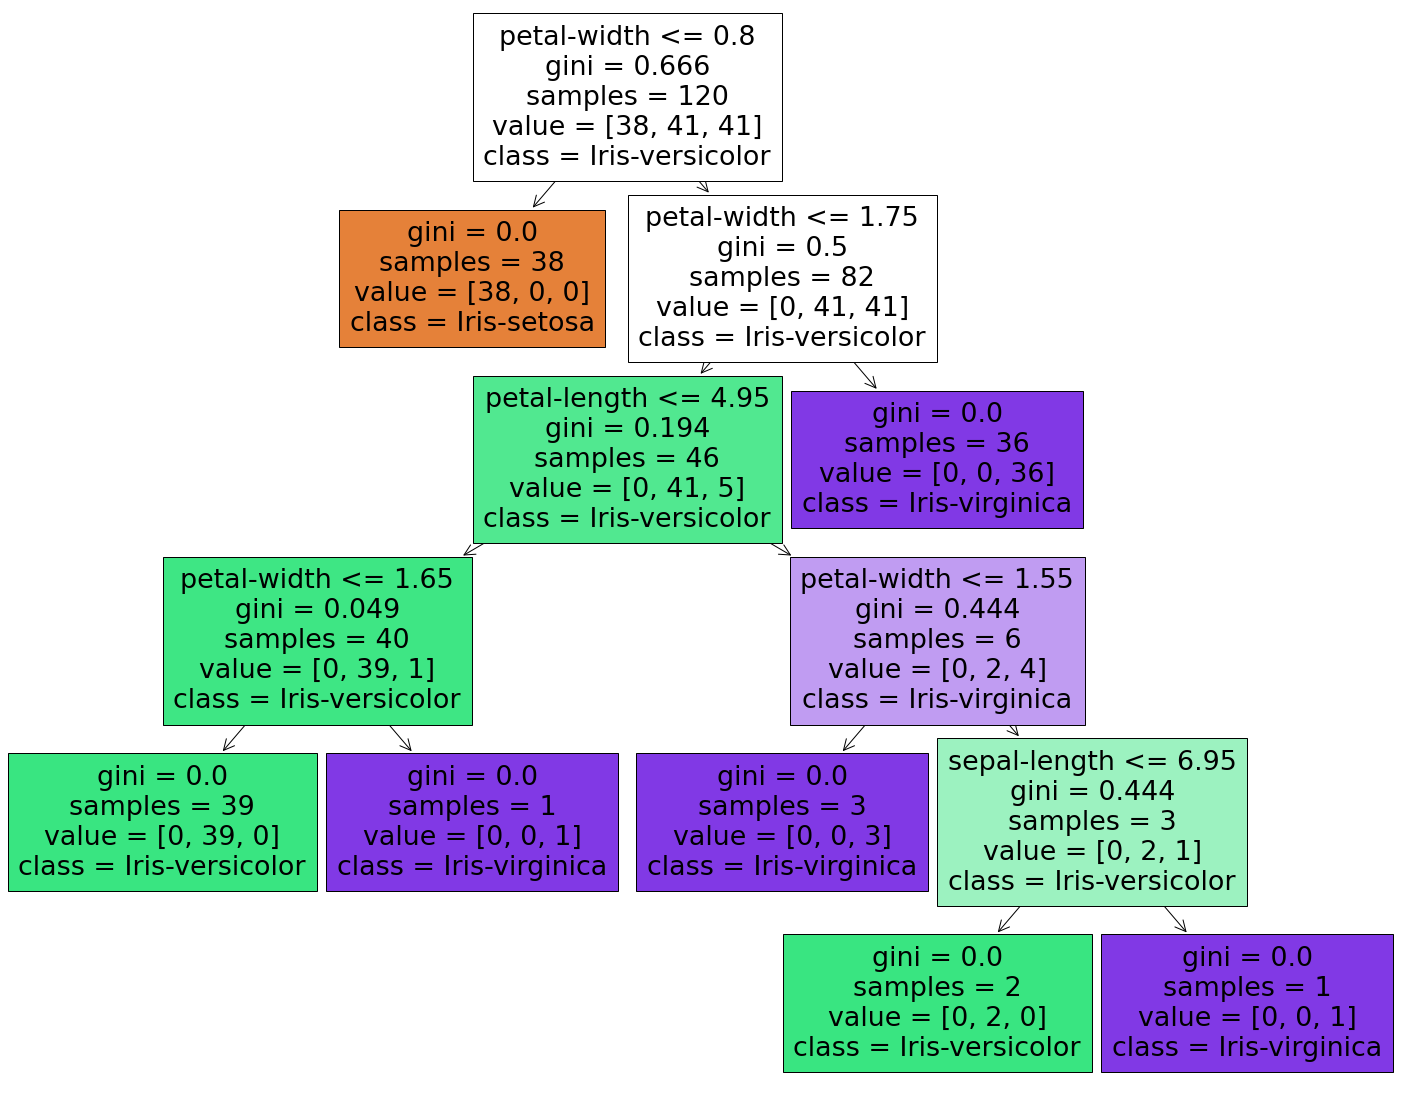

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("*****CONFUSION MATRIX****")
print(confusion_matrix(y_test,y_pred))
print("*****OVERALL RES****")
print(classification_report(y_test,y_pred))

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=['sepal-length', 'sepal-width', 'petal-length', 'petal-width'],  
                   class_names=le.classes_,
                   filled=True)

**NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
irisdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification_ML/iris.data", names=colnames)
print(irisdata.head())
le = LabelEncoder()
le.fit(irisdata['Class'])
# print("label encoded classes:",le.classes_)
class_enc = le.transform(irisdata['Class'])
# print("Data transformed encoded:" , class_enc)

irisdata['Class'] = class_enc

#Split Data
X = irisdata.drop('Class',axis=1)#x is all columns except class column
y = irisdata['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred  =  classifier.predict(X_test)

print("*****CONFUSION MATRIX****")
print(confusion_matrix(y_test,y_pred))
print("*****OVERALL RES****")
print(classification_report(y_test,y_pred))

In [5]:
#Naive Bayes Manual
# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
irisdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification_ML/iris.data", names=colnames)
print(irisdata.head())
le = LabelEncoder()
le.fit(irisdata['Class'])
# print("label encoded classes:",le.classes_)
class_enc = le.transform(irisdata['Class'])
# print("Data transformed encoded:" , class_enc)

irisdata['Class'] = class_enc

#Split Data
X = irisdata.drop('Class',axis=1)#x is all columns except class column
y = irisdata['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

class_0 = np.where(y_train==0)[0]
class_1 = np.where(y_train==1)[0]
class_2 = np.where(y_train==2)[0]

print(len(class_0),len(class_1),len(class_2))

def getGaussProb(Data):
  means = np.mean(Data)
  stds = np.std(Data)
  return menas, stds

X_0 = X_train[class_0,:]
X_1 = X_train[class_1,:]
X_2 = X_train[class_2,:]



   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
38 42 40


**KNN Classifier**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
# from sklearn import neighbors, datasets

In [7]:
# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
# Read dataset to pandas dataframe
irisdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Classification_ML/iris.data", names=colnames)
print(irisdata.head())
le = LabelEncoder()
le.fit(irisdata['Class'])
# print("label encoded classes:",le.classes_)
class_enc = le.transform(irisdata['Class'])
# print("Data transformed encoded:" , class_enc)

irisdata['Class'] = class_enc

#Split Data
X = irisdata.drop('Class',axis=1)#x is all columns except class column
y = irisdata['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

   sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [28]:
model = KNeighborsClassifier(n_neighbors=10,weights='distance')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("*****CONFUSION MATRIX****")
print(confusion_matrix(y_test,y_pred))
print("*****OVERALL RES****")
print(classification_report(y_test,y_pred))

n_point = 17
k_dist, k_idx= model.kneighbors(X_test[n_point,:].reshape(1,-1), 5, return_distance=True)
y_pred = model.predict(X_test[n_point,:].reshape(1,-1))
k_dist = k_dist[0] #take only values for first query
k_idx = k_idx[0] #take only values for first query
Points = X_train[k_idx,:]
Classes = y_train[k_idx]
print("x input, ", X_test[n_point,:].reshape(1,-1))
print("pred class, ", y_pred)
print("K nearest idx, ", k_idx )
print("K nearest points, ", Points, "\n classes",Classes )
print("K nearest dist ", k_dist )

*****CONFUSION MATRIX****
[[ 7  0  0]
 [ 0 13  0]
 [ 0  1  9]]
*****OVERALL RES****
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.93      1.00      0.96        13
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

x input,  [[6.7 3.  5.  1.7]]
pred class,  [1]
K nearest idx,  [49  0 20 25 21]
K nearest points,  [[6.9 3.1 4.9 1.5]
 [6.7 3.1 4.7 1.5]
 [6.5 3.  5.2 2. ]
 [6.8 2.8 4.8 1.4]
 [6.3 2.8 5.1 1.5]] 
 classes [1 1 2 1 2]
K nearest dist  [0.31622777 0.37416574 0.41231056 0.42426407 0.5       ]


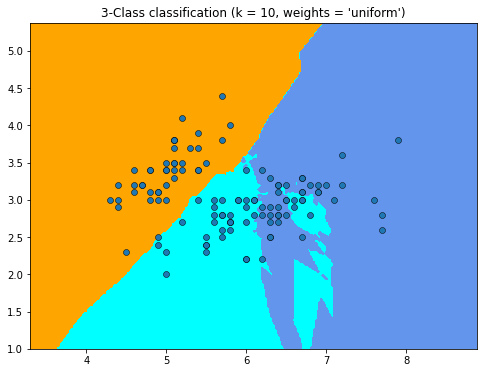

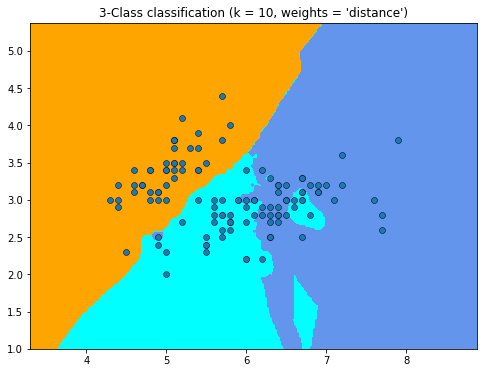

In [14]:
#Voronoi regions

X_train = X_train[:,0:2]
h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors=10, weights=weights)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1,  X_train[:, 0].max() + 1
    y_min, y_max =  X_train[:, 1].min() - 1,  X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(
        x= X_train[:, 0],
        y= X_train[:, 1],
        # hue=iris.target_names[y],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (10, weights)
    )
    # plt.xlabel(iris.feature_names[0])
    # plt.ylabel(iris.feature_names[1])

plt.show()